## Construindo um modelo de Regressão para marketing

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [4]:
# Criando o DataFrame
df = pd.read_csv('/MKT.csv')

In [5]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [7]:
# Estatísticas descritivas gerais
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [8]:
# Função para identificar outliers usando o método do IQR
def detectar_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Primeiro quartil (25%)
    Q3 = data[column].quantile(0.75)  # Terceiro quartil (75%)
    IQR = Q3 - Q1  # Intervalo interquartil
    lim_inf = Q1 - 1.5 * IQR  # Limite inferior
    lim_sup = Q3 + 1.5 * IQR  # Limite superior
    outliers = data[(data[column] < lim_inf) | (data[column] > lim_sup)]
    return outliers

# Verificando outliers para cada coluna
colunas = ['youtube', 'facebook', 'newspaper', 'sales']

for coluna in colunas:
    outliers = detectar_outliers_iqr(df, coluna)
    print(f"Outliers na coluna {coluna}:")
    print(outliers)
    print("-" * 50)


Outliers na coluna youtube:
Empty DataFrame
Columns: [youtube, facebook, newspaper, sales]
Index: []
--------------------------------------------------
Outliers na coluna facebook:
Empty DataFrame
Columns: [youtube, facebook, newspaper, sales]
Index: []
--------------------------------------------------
Outliers na coluna newspaper:
    youtube  facebook  newspaper  sales
46    20.28     52.44     107.28  10.44
72   355.68     43.56     121.08  28.56
--------------------------------------------------
Outliers na coluna sales:
Empty DataFrame
Columns: [youtube, facebook, newspaper, sales]
Index: []
--------------------------------------------------


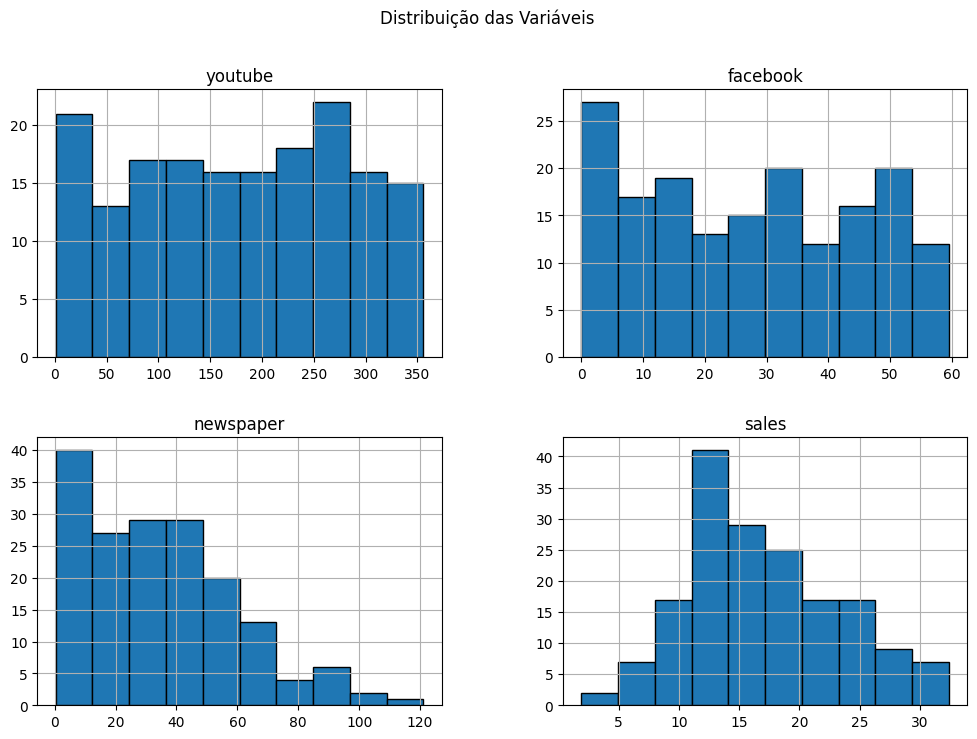

In [10]:
# Histogramas para cada coluna
df.hist(bins=10, figsize=(12, 8), edgecolor='black')
plt.suptitle("Distribuição das Variáveis")
plt.show()

#interpretação de cada para cada variável:

#1. YouTube: Os investimentos em YouTube estão bem distribuídos, há tanto campanhas de baixo custo quanto campanhas de alto custo.
#2. Facebook: Na maioria das campanhas os investimentos no Facebook foram relativamente baixos.
#3. Newspaper: A maioria das campanhas investiu pouco em anúncios de jornal, mas existem alguns outliers com investimentos significativamente mais altos.
#4. Sales: A maioria das campanhas gerou vendas médias, com poucos casos de vendas muito altas ou muito baixas.

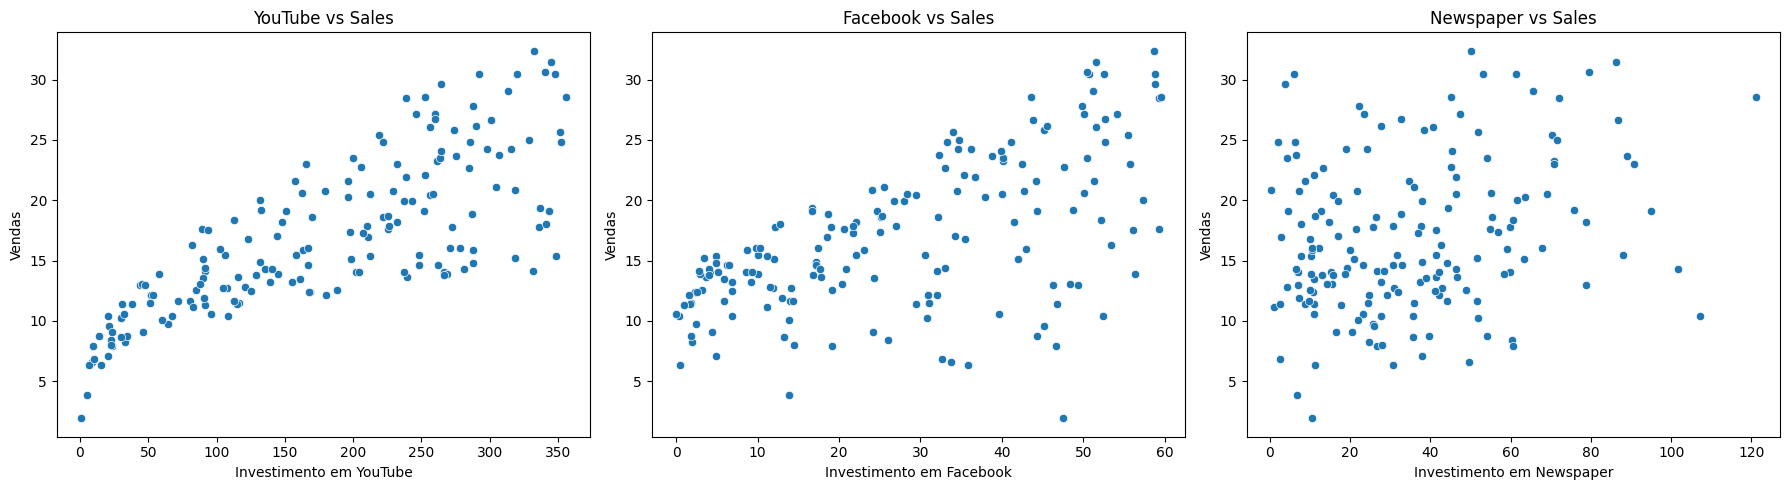

In [12]:
# Gráfico de dispersão (scatterplot) entre investimentos e vendas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(ax=axes[0], x="youtube", y="sales", data=df)
axes[0].set_title("YouTube vs Sales")
axes[0].set_xlabel("Investimento em YouTube")
axes[0].set_ylabel("Vendas")

sns.scatterplot(ax=axes[1], x="facebook", y="sales", data=df)
axes[1].set_title("Facebook vs Sales")
axes[1].set_xlabel("Investimento em Facebook")
axes[1].set_ylabel("Vendas")

sns.scatterplot(ax=axes[2], x="newspaper", y="sales", data=df)
axes[2].set_title("Newspaper vs Sales")
axes[2].set_xlabel("Investimento em Newspaper")
axes[2].set_ylabel("Vendas")

plt.tight_layout()
plt.show()

In [13]:
# Dividindo os dados em variáveis independentes (X) e dependente (y)
X = df[["youtube", "facebook", "newspaper"]]
y = df["sales"]

In [15]:
# Dividindo em conjunto de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Criando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [17]:
# Prevendo valores no conjunto de teste
y_pred = modelo.predict(X_test)

In [18]:
# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [19]:
# Coeficientes do modelo
coeficientes = pd.DataFrame({
    "Variável": X.columns,
    "Coeficiente": modelo.coef_
})

In [27]:
# Exibindo os resultados
print({
    "MSE": mse,
    "R²": r2
})

# O desempenho do modelo foi avaliado com as seguintes métricas:

# MSE (Mean Squared Error): 5.57 (quanto menor, melhor).
# R² (Coeficiente de Determinação): 0.87 (indica que 87% da variância nas vendas pode ser explicada pelos investimentos).

{'MSE': 5.576790234026713, 'R²': 0.872863085701216}
